### Assignment-07 LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import streamlit as st


In [2]:
# Load dataset 
train_df = pd.read_csv('C:\\Users\\kavya\\OneDrive\\Attachments\\Desktop\\Assignments\\Titanic_train.csv')
test_df=pd.read_csv('C:\\Users\\kavya\\OneDrive\\Attachments\\Desktop\\Assignments\\Titanic_test.csv')


In [3]:
def preprocess_data(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

C:\Users\kavya\AppData\Local\Temp\ipykernel_4428\2134502139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\kavya\AppData\Local\Temp\ipykernel_4428\2134502139.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [4]:
# Splitting data
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
# Predictions
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



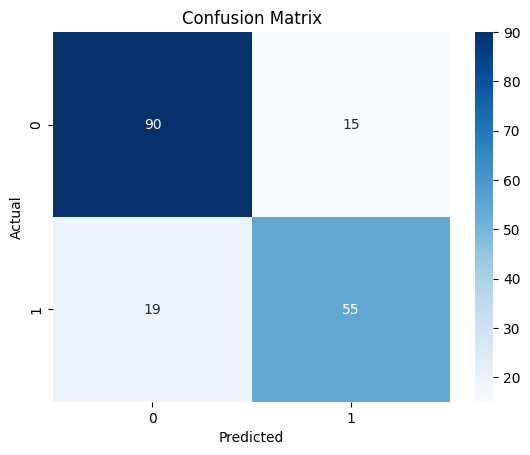

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


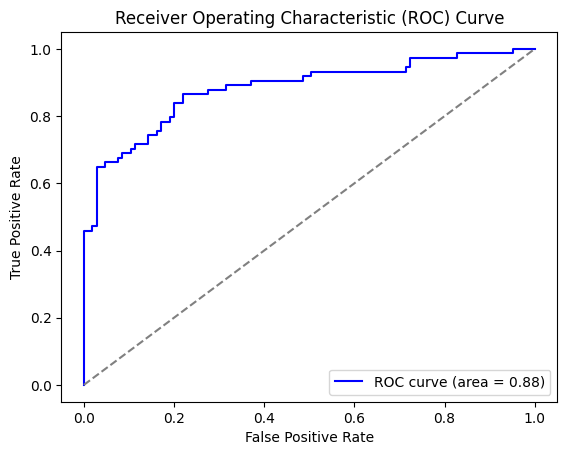

In [10]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [11]:
# Streamlit app for deployment
def run_streamlit_app():
    st.title("Titanic Survival Prediction")
    pclass = st.selectbox("Pclass", [1, 2, 3])
    age = st.number_input("Age", min_value=0, max_value=100, value=30)
    sibsp = st.number_input("SibSp", min_value=0, max_value=10, value=0)
    parch = st.number_input("Parch", min_value=0, max_value=10, value=0)
    fare = st.number_input("Fare", min_value=0.0, value=32.0)
    sex = st.selectbox("Sex", ["male", "female"])
    embarked = st.selectbox("Embarked", ["C", "Q", "S"])

    sex_encoded = 1 if sex == "male" else 0
    embarked_encoded = [1 if embarked == "Q" else 0, 1 if embarked == "S" else 0]

    input_data = np.array([[pclass, age, sibsp, parch, fare, sex_encoded] + embarked_encoded])
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)[0]
    st.write("Predicted Survival:", "Survived" if prediction == 1 else "Not Survived")

if __name__ == "__main__":
    run_streamlit_app()


2025-02-27 14:37:35.452 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:37:36.864 
  command:

    streamlit run C:\Users\kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-27 14:37:36.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:37:36.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:37:36.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:37:36.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:37:36.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:37:

### Interview questions

#### 1. What is the difference between precision and recall?
Precision and recall are both metrics used to evaluate the performance of a classification model, particularly in binary classification tasks. They focus on different aspects of the model's predictions:

*Precision measures the accuracy of the positive predictions. It is the ratio of true positives (correctly predicted positive instances) to the total number of predicted positives (true positives + false positives).

                      Precision=  True Positives (TP) / True Positives (TP)+False Positives (FP)
A high precision indicates that the model is good at avoiding false positives.

*Recall (also known as sensitivity or true positive rate) measures the model's ability to identify all relevant instances. It is the ratio of true positives to the total number of actual positives (true positives + false negatives).
                        Recall= True Positives (TP) / True Positives (TP)+False Negatives (FN)
A high recall indicates that the model is good at capturing most of the positive instances.


##### Key Difference:

Precision focuses on the quality of positive predictions (how many predicted positives are actually correct).

Recall focuses on the coverage of actual positives (how many actual positives are correctly predicted).

There is often a trade-off between precision and recall. For example, increasing recall (capturing more positives) may lead to more false positives, reducing precision.


#### 2.What is cross-validation, and why is it important in binary classification?
Cross-validation is a resampling technique used to evaluate the performance of a machine learning model on a limited dataset. It involves partitioning the dataset into multiple subsets, training the model on some subsets, and validating it on the remaining subsets.
The most common form is k-fold cross-validation, where the dataset is divided into k equal parts (folds). The model is trained k times, each time using k−1 folds for training and the remaining fold for validation.

#### Why is cross-validation important in binary classification?

1.Reduces Overfitting: Cross-validation ensures that the model is evaluated on multiple subsets of the data, reducing the risk of overfitting to a specific training-validation split.

2.Better Estimation of Model Performance: By averaging the performance metrics (e.g., accuracy, precision, recall) across all folds, cross-validation provides a more robust estimate of how the model will perform on unseen data compared to a single train-test split.

3.Optimal Use of Data: In binary classification, especially with imbalanced datasets, cross-validation ensures that each class is represented in both training and validation sets, leading to a more reliable evaluation.

4.Hyperparameter Tuning: Cross-validation is often used in conjunction with techniques like grid search to find the best hyperparameters for the model, ensuring that the chosen parameters generalize well.